In [ ]:
# 손글씨 데이터를 가져와서 분석해보기
# 0~9까지의 숫자

In [1]:
from tensorflow.keras.datasets import mnist
((X_train,y_train),(X_test,y_test)) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
# 데이터 갯수, 세로크기, 가로크기
X_train.shape

(60000, 28, 28)

In [3]:
# 0 > 검은색
# 244 > 흰색
# 20*28 픽셀
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

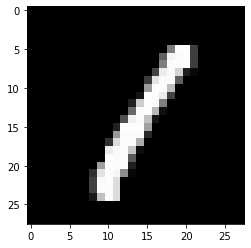

In [5]:
# 데이터 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[3],cmap='gray')
plt.show()

In [6]:
# 값이 0~ 255(정수) 로 분포
# 분산(값의 분포)이 크기때문에 계산상에 오류가 발생할 수  있음
# 적은 범위의 숫자로 표현 - ~255(정수) > 0 ~ 1 (실수)
X_train = X_train.astype('float') / 255
X_test = X_test.astype('float') / 255

In [7]:
# Dense의 한계
# 1차원만 학습 가능 > 데이터가 모양을 잃어 모양이 가지는 의미가 사라짐
X_train = X_train.reshape((60000,28*28))
X_test = X_test.reshape((10000,28*28))

In [8]:
import pandas as pd
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [11]:
X_train.shape

(60000, 784)

In [12]:
y_train.shape

(60000, 10)

In [9]:
from tensorflow.keras import Sequential # 딥러닝 모델의 뼈대
from tensorflow.keras.layers import InputLayer, Dense

In [14]:
model1 = Sequential()

# 모델설계
model1.add(Dense(units= 853, activation='relu',input_dim = 784)) 
# 중간층
model1.add(Dense(units= 457, activation='relu')) 
model1.add(Dense(units= 394, activation='relu')) 


# 학습방법 설정
model1.add(Dense(units= 10, activation='softmax'))


In [16]:
model1.compile(
    loss='categorical_crossentropy',
    optimizer ='adam',
    metrics=['accuracy']
)

In [17]:
model1.fit(X_train,y_train, epochs= 20, validation_data =(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 14s 4ms/step - loss: 0.1970 - accuracy: 0.9411 - val_loss: 0.1008 - val_accuracy: 0.9701
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0925 - accuracy: 0.9721 - val_loss: 0.0844 - val_accuracy: 0.9760
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0640 - accuracy: 0.9803 - val_loss: 0.0860 - val_accuracy: 0.9754
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0525 - accuracy: 0.9838 - val_loss: 0.0900 - val_accuracy: 0.9765
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0414 - accuracy: 0.9875 - val_loss: 0.0838 - val_accuracy: 0.9770
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0362 - accuracy: 0.9889 - val_loss: 0.0812 - val_accuracy: 0.9800
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0324 - accuracy: 0.9901 - val_loss: 0.0895 - val_accuracy